## 1. 주피터 노트북 사용법
* Shift + Enter: 셀이 실행되고 커서가 다음셀로 이동
* Ctrl + Enter: 셀이 실행되고 커서가 그 셀에 유지
* Enter: 편집상태로 변환
* ESC 키를 누르고
  * a: 위에 셀 한 개 추가
  * b: 아래에 셀 한 개 추가
  * dd: 셀 삭제
  * m: 마크다운 셀로 변경
  * y: 코드 셀로 변경
* View -> Toggle Line Numbers : 라인 넘버를 확인
* 
Kernel -> Restart & Clear Output : 커널과 결과를 초기화
### 마크다운(Markdown) 이란? 
* 코드와 함께 문서화 할 수 있는 `문법`
```
여러 줄의 설명을
줄바꿈으로 쓰고자 할 때
```

In [2]:
print("Hello World")

Hello World


In [3]:
a = 1
b = 2
a + b

3

In [4]:
# PEP20
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## 2. Pandas basic
### DataFrame

In [6]:
import pandas as pd

# DataFrame 생성
df = pd.DataFrame(
    { "a": [4, 5, 6, 4],
     "b": [7, 8, 9, 9],
     "c": [10, 11, 12, 12]},
    index = [1, 2, 3, 4])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
4,4,9,12


### Series

In [8]:
# a column 
df["a"]

1    4
2    5
3    6
4    4
Name: a, dtype: int64

In [9]:
# dataFrame 형태로 출력
df[["a"]]

,a
1,4
2,5
3,6
4,4


### Subset

In [11]:
# 행(row) 기준으로 조건에 맞는 데이터 불러옴
df[df["a"] > 4]

# 두 개 이상의 열(Column)을 가져올 때 dataframe 형식으로 불러오기
df[["a", "b"]]

,a,b
1,4,7
2,5,8
3,6,9
4,4,9


### Summerize Data

In [13]:
df["a"].value_counts()
len(df)

4

### Reshaping
#### sort_values, drop

In [15]:
# a column 기준 내림차순 정렬
df.sort_values("a", ascending=False)

,a,b,c
3,6,9,12
2,5,8,11
1,4,7,10
4,4,9,12


In [16]:
# c column drop
df = df.drop(["c"], axis=1)
df

,a,b
1,4,7
2,5,8
3,6,9
4,4,9


### Group Data
#### Groupby, Pivot_table

In [18]:
df.groupby(["a"])["b"].agg(["mean", "sum", "count"])

,mean,sum,count
a,,,
4,8.0,16,2
5,8.0,8,1
6,9.0,9,1


In [19]:
df.groupby(["a"])["b"].describe()

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
4,2.0,8.0,1.414214,7.0,7.5,8.0,8.5,9.0
5,1.0,8.0,NaN,8.0,8.0,8.0,8.0,8.0
6,1.0,9.0,NaN,9.0,9.0,9.0,9.0,9.0


In [20]:
pd.pivot_table(df, index="a", values="b", aggfunc="sum")

,b
a,
4,16
5,8
6,9


### Plotting

<Axes: >

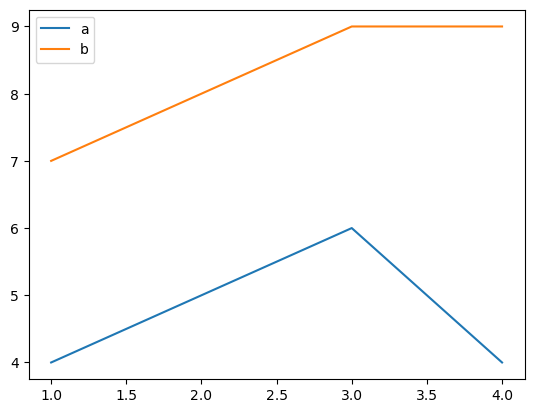

In [22]:
df.plot()

<Axes: >

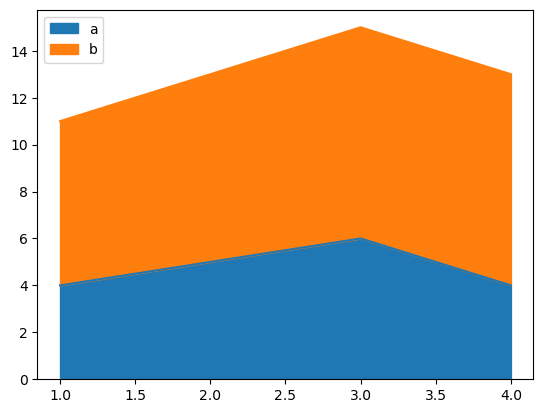

In [23]:
df.plot.area()

<Axes: >

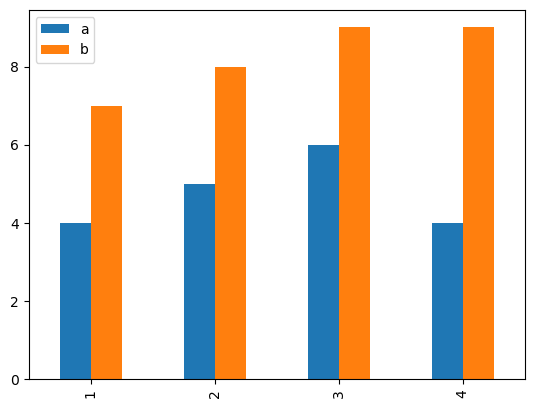

In [24]:
df.plot.bar()

## 3. File_route
### 절대 경로
   * 고유한 경로, 차상위 디렉토리 포함
### 상대 경로
   * 현재 위치한 곳을 기준
   * / 루트
   * ./ 현재 위치
   * ../ 현재 위치의 상위 폴더
   * ../../ 두 단계 위의 상위 폴더

In [26]:
# 실습 파일 경로 확인
%pwd

'C:\\Users\\70160\\jupyter_tutorial'

In [27]:
import os
os.getcwd()

'C:\\Users\\70160\\jupyter_tutorial'

In [28]:
# 데이터 폴더의 모든 파일 불러오기
from glob import glob
glob("data/*")

['data\\NHIS_OPEN_GJ_2017.CSV',
 'data\\store',
 'data\\도로교통공단_월별 주야별 교통사고 통계_20231231.csv',
 'data\\상가(상권)정보_의료기관_201909.csv',
 'data\\서울특별시 강남구_생활폐기물배출량_20221019.csv']

In [29]:
# 특정 문자열 포함된 파일 불러오기
file_name = glob("data/*도로*")
file_name

['data\\도로교통공단_월별 주야별 교통사고 통계_20231231.csv']

In [30]:
import pandas as pd
pd.read_csv('data\\도로교통공단_월별 주야별 교통사고 통계_20231231.csv', encoding="cp949")

,발생월,주야,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,1,주,8682,98,2209,9440,759
1,1,야,5798,92,1539,6349,530
2,2,주,8056,95,2149,8710,710
3,2,야,5228,86,1419,5553,500
4,3,주,10393,109,2600,11132,880
5,3,야,5607,78,1449,5930,467
6,4,주,10460,93,2797,11356,1055
7,4,야,5876,89,1609,6181,551
8,5,주,11668,135,3132,12618,1178
9,5,야,5884,68,1576,6233,603


### 여러 파일을 한 번에 로드하는 방법

In [32]:
file_csv = glob("data/store/*.csv")
file_csv

['data/store\\소상공인시장진흥공단_상가(상권)정보_강원_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_경기_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_경남_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_경북_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_광주_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_대구_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_대전_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_부산_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_서울_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_세종_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_울산_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_인천_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_전남_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_전북_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_제주_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_충남_202406.csv',
 'data/store\\소상공인시장진흥공단_상가(상권)정보_충북_202406.csv']

In [34]:
file_list = []
for file_csv_name in file_csv:
    temp = pd.read_csv(file_csv_name, low_memory=False)
    file_list.append(temp)

# 하나의 dataframe으로 합치기
df = pd.concat(file_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2338043 entries, 0 to 78830
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     object 
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      int64  
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      float64
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      float64
 26  도로명        object 
 27  건물본번지      float64
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      int64  
 33  신우편번호      int64  
 34  동정보        float64
 35  층